# WPL Batting Analysis (2022-23/2023-24)

## Data Loading

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
bat_data_og = pd.read_csv("wpl_bat.csv")

In [5]:
bat_data_og.head()
bat_data_og.info()
bat_data_og.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10176 entries, 0 to 10175
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   match_id          10176 non-null  int64  
 1   season            10176 non-null  object 
 2   start_date        10176 non-null  object 
 3   venue             10176 non-null  object 
 4   innings           10176 non-null  int64  
 5   ball              10176 non-null  float64
 6   batting_team      10176 non-null  object 
 7   bowling_team      10176 non-null  object 
 8   striker           10176 non-null  object 
 9   non_striker       10176 non-null  object 
 10  bowler            10176 non-null  object 
 11  runs_off_bat      10176 non-null  int64  
 12  extras            10176 non-null  int64  
 13  wides             268 non-null    float64
 14  noballs           28 non-null     float64
 15  byes              36 non-null     float64
 16  legbyes           88 non-null     float6

,match_id,innings,ball,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty
count,1.017600e+04,10176.000000,10176.000000,10176.000000,10176.000000,268.000000,28.0,36.000000,88.000000,0.0
mean,1.388847e+06,1.471403,9.360250,1.230542,0.058962,1.328358,1.0,2.055556,1.613636,NaN
std,2.939043e+04,0.499206,5.623449,1.612578,0.354213,0.962021,0.0,1.413091,1.138983,NaN
min,1.358929e+06,1.000000,0.100000,0.000000,0.000000,1.000000,1.0,1.000000,1.000000,NaN
25%,1.358940e+06,1.000000,4.400000,0.000000,0.000000,1.000000,1.0,1.000000,1.000000,NaN
50%,1.417716e+06,1.000000,9.300000,1.000000,0.000000,1.000000,1.0,1.000000,1.000000,NaN
75%,1.417727e+06,2.000000,14.200000,1.000000,0.000000,1.000000,1.0,4.000000,2.000000,NaN
max,1.417737e+06,2.000000,19.700000,6.000000,5.000000,5.000000,1.0,4.000000,4.000000,NaN


In [6]:
bat_data_work = bat_data_og.copy()

In [7]:
bat_data_work.isnull().sum()

match_id                0
season                  0
start_date              0
venue                   0
innings                 0
ball                    0
batting_team            0
bowling_team            0
striker                 0
non_striker             0
bowler                  0
runs_off_bat            0
extras                  0
wides                9908
noballs             10148
byes                10140
legbyes             10088
penalty             10176
wicket_type          9650
player_dismissed     9650
dtype: int64

In [8]:
bat_data_work.head(3)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed
0,1358929,2022/23,04-03-2023,"Dr DY Patil Sports Academy, Mumbai",1,0.1,Mumbai Indians,Gujarat Giants,YH Bhatia,HK Matthews,A Gardner,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1358929,2022/23,04-03-2023,"Dr DY Patil Sports Academy, Mumbai",1,0.2,Mumbai Indians,Gujarat Giants,YH Bhatia,HK Matthews,A Gardner,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1358929,2022/23,04-03-2023,"Dr DY Patil Sports Academy, Mumbai",1,0.3,Mumbai Indians,Gujarat Giants,YH Bhatia,HK Matthews,A Gardner,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Data cleaning and preparation

In [10]:
bat_data_work['wides'] = bat_data_work['wides'].fillna(0).astype(int)
bat_data_work['noballs'] = bat_data_work['noballs'].fillna(0).astype(int)
bat_data_work['byes'] = bat_data_work['byes'].fillna(0).astype(int)
bat_data_work['legbyes'] = bat_data_work['legbyes'].fillna(0).astype(int)
bat_data_work['penalty'] = bat_data_work['penalty'].fillna(0).astype(int)

In [11]:
bat_data_work.head(3)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,bowler,runs_off_bat,extras,wides,noballs,byes,legbyes,penalty,wicket_type,player_dismissed
0,1358929,2022/23,04-03-2023,"Dr DY Patil Sports Academy, Mumbai",1,0.1,Mumbai Indians,Gujarat Giants,YH Bhatia,HK Matthews,A Gardner,0,0,0,0,0,0,0,NaN,NaN
1,1358929,2022/23,04-03-2023,"Dr DY Patil Sports Academy, Mumbai",1,0.2,Mumbai Indians,Gujarat Giants,YH Bhatia,HK Matthews,A Gardner,0,0,0,0,0,0,0,NaN,NaN
2,1358929,2022/23,04-03-2023,"Dr DY Patil Sports Academy, Mumbai",1,0.3,Mumbai Indians,Gujarat Giants,YH Bhatia,HK Matthews,A Gardner,0,0,0,0,0,0,0,NaN,NaN


In [12]:
bat_data_work.isnull().sum()

match_id               0
season                 0
start_date             0
venue                  0
innings                0
ball                   0
batting_team           0
bowling_team           0
striker                0
non_striker            0
bowler                 0
runs_off_bat           0
extras                 0
wides                  0
noballs                0
byes                   0
legbyes                0
penalty                0
wicket_type         9650
player_dismissed    9650
dtype: int64

### Additional Columns

In [14]:
bat_data_work['dot_ball'] = bat_data_work['runs_off_bat'].apply(lambda x: 1 if x == 0 else 0)
bat_data_work["1's"] = bat_data_work['runs_off_bat'].apply(lambda x: 1 if x == 1 else 0)
bat_data_work["2's"] = bat_data_work['runs_off_bat'].apply(lambda x: 1 if x == 2 else 0)
bat_data_work["3's"] = bat_data_work['runs_off_bat'].apply(lambda x: 1 if x == 3 else 0)
bat_data_work["4's"] = bat_data_work['runs_off_bat'].apply(lambda x: 1 if x == 4 else 0)
bat_data_work["6's"] = bat_data_work['runs_off_bat'].apply(lambda x: 1 if x == 6 else 0)

In [15]:
bat_data_work.head(3)

,match_id,season,start_date,venue,innings,ball,batting_team,bowling_team,striker,non_striker,...,legbyes,penalty,wicket_type,player_dismissed,dot_ball,1's,2's,3's,4's,6's
0,1358929,2022/23,04-03-2023,"Dr DY Patil Sports Academy, Mumbai",1,0.1,Mumbai Indians,Gujarat Giants,YH Bhatia,HK Matthews,...,0,0,NaN,NaN,1,0,0,0,0,0
1,1358929,2022/23,04-03-2023,"Dr DY Patil Sports Academy, Mumbai",1,0.2,Mumbai Indians,Gujarat Giants,YH Bhatia,HK Matthews,...,0,0,NaN,NaN,1,0,0,0,0,0
2,1358929,2022/23,04-03-2023,"Dr DY Patil Sports Academy, Mumbai",1,0.3,Mumbai Indians,Gujarat Giants,YH Bhatia,HK Matthews,...,0,0,NaN,NaN,1,0,0,0,0,0


#### Terms related to Batting

In [17]:
played = bat_data_work.groupby('striker')['match_id'].nunique().reset_index(name = 'played')

runs_scored = bat_data_work.groupby(['striker'])['runs_off_bat'].sum().reset_index(name = 'runs_scored')

# inns_batted = bat_data_work.groupby(['striker'])['match_id'].apply(lambda x :len(list(np.unique(x)))).reset_index().rename(columns = {'match_id':'inns_batted'})

balls_faced = bat_data_work.groupby(['striker'])['match_id'].count().reset_index(name = 'balls_faced')

dismissed = bat_data_work[bat_data_work['player_dismissed'] == bat_data_work['striker']].groupby('striker').size().reset_index(name='dismissed')

In [18]:
# Merging all this data together
batter_stats = played.merge(balls_faced,on = 'striker').merge(runs_scored,on = 'striker').merge(dismissed,on = 'striker')

In [19]:
batter_stats.head(3)

,striker,played,balls_faced,runs_scored,dismissed
0,A Capsey,15,289,389,13
1,A Gardner,16,258,324,15
2,A Reddy,6,49,50,5


## Key Performance Metrics Calculation

### Calculate various performance metrics such as batting average, strike rate, and boundaries

#### 1 . Batting Average: Batting average is total runs scored divided by the number of dismissals

In [23]:
bat_avg = runs_scored.merge(dismissed, left_on='striker', right_on='striker', how='left')
bat_avg['Batting_Average'] = bat_avg['runs_scored'] / bat_avg['dismissed']

In [24]:
bat_avg.head(3)

,striker,runs_scored,dismissed,Batting_Average
0,A Capsey,389,13.0,29.923077
1,A Gardner,324,15.0,21.600000
2,A Reddy,50,5.0,10.000000


#### 2 . Strike Rate: Strike rate is number of runs per 100 balls played

In [26]:
strike_rate = runs_scored.merge(balls_faced, left_on='striker', right_on='striker', how='left')
strike_rate['strike_rate'] = (strike_rate['runs_scored'] / strike_rate['balls_faced']) * 100

In [27]:
strike_rate.head(3)

,striker,runs_scored,balls_faced,strike_rate
0,A Capsey,389,289,134.602076
1,A Gardner,324,258,125.581395
2,A Reddy,50,49,102.040816


#### 3 . Runs Scoring Analysis : Number of Dot Balls, 1s, 2s, 3s made by each batter

In [29]:
dots = bat_data_work.groupby(['striker'])['dot_ball'].sum().reset_index(name = 'dots')
ones = bat_data_work.groupby(['striker'])["1's"].sum().reset_index(name = "1's")
twos = bat_data_work.groupby(['striker'])["2's"].sum().reset_index(name = "2's")
threes = bat_data_work.groupby(['striker'])["3's"].sum().reset_index(name = "3's")

runs_pattern = dots.merge(ones,on = 'striker').merge(twos,on = 'striker').merge(threes,on = 'striker')

In [30]:
runs_pattern.head(3)

,striker,dots,1's,2's,3's
0,A Capsey,126,95,5,0
1,A Gardner,100,104,6,0
2,A Reddy,20,21,1,1


#### 4 . Boundary Analysis: Number of 4s and 6s hits by each batter

In [32]:
fours = bat_data_work.groupby(['striker'])["4's"].sum().reset_index(name = "4's")
sixes = bat_data_work.groupby(['striker'])["6's"].sum().reset_index(name = "6's")
boundaries_pattern = fours.merge(sixes,on = 'striker')

In [33]:
boundaries_pattern.head(3)

,striker,4's,6's
0,A Capsey,47,16
1,A Gardner,40,8
2,A Reddy,6,0


#### 5 . Merging All Metrics: Combining all above calculated metrics into one DataFrame for detailed analysis

In [35]:
# striker,played,inns_batted,balls_faced,runs_scored,bat_avg,strike_rate,runs_pattern,boundaries_pattern

In [36]:
batter_analysis = played.merge(runs_scored, on='striker', how='left').merge(balls_faced, on='striker', how='left').merge(runs_pattern, on='striker', how='left').merge(boundaries_pattern, on='striker', how='left').merge(dismissed, on='striker', how='left')

batter_analysis['Avg'] = (batter_analysis['runs_scored'] / batter_analysis['dismissed'])
batter_analysis['SR'] = (batter_analysis['runs_scored'] / batter_analysis['balls_faced']) * 100
batter_analysis['NotOut'] =  (batter_analysis['played'] - batter_analysis['dismissed'])

In [37]:
batter_analysis.head(3)

,striker,played,runs_scored,balls_faced,dots,1's,2's,3's,4's,6's,dismissed,Avg,SR,NotOut
0,A Capsey,15,389,289,126,95,5,0,47,16,13.0,29.923077,134.602076,2.0
1,A Gardner,16,324,258,100,104,6,0,40,8,15.0,21.600000,125.581395,1.0
2,A Reddy,6,50,49,20,21,1,1,6,0,5.0,10.000000,102.040816,1.0


## Data Visualization

#### 1 . Top 10 Batters by Total Runs

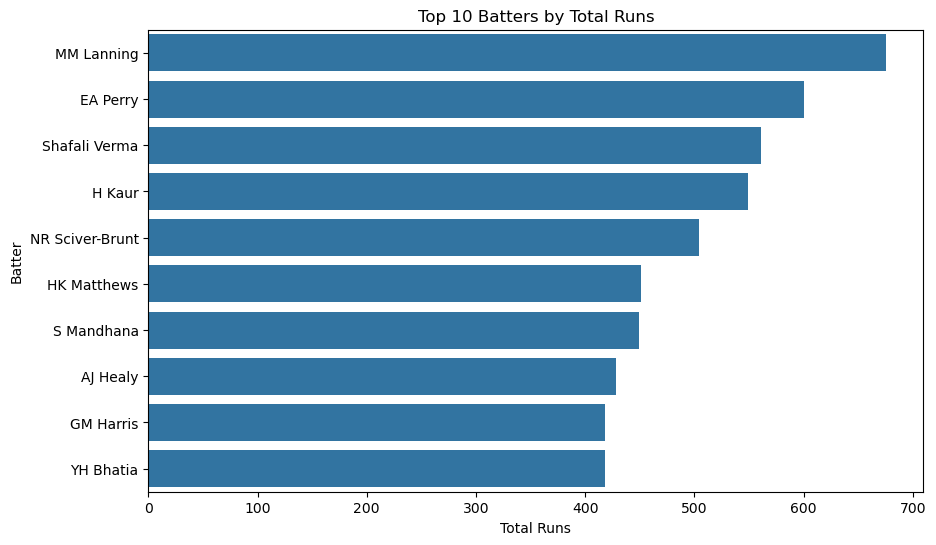

In [40]:
top_batters = batter_analysis.sort_values('runs_scored', ascending=False).head(10)
plt.figure(figsize=(10,6))
sns.barplot(x='runs_scored', y='striker', data=top_batters)
plt.title('Top 10 Batters by Total Runs')
plt.xlabel('Total Runs')
plt.ylabel('Batter')
plt.show()

#### 2 . Batting Average vs Strike Rate

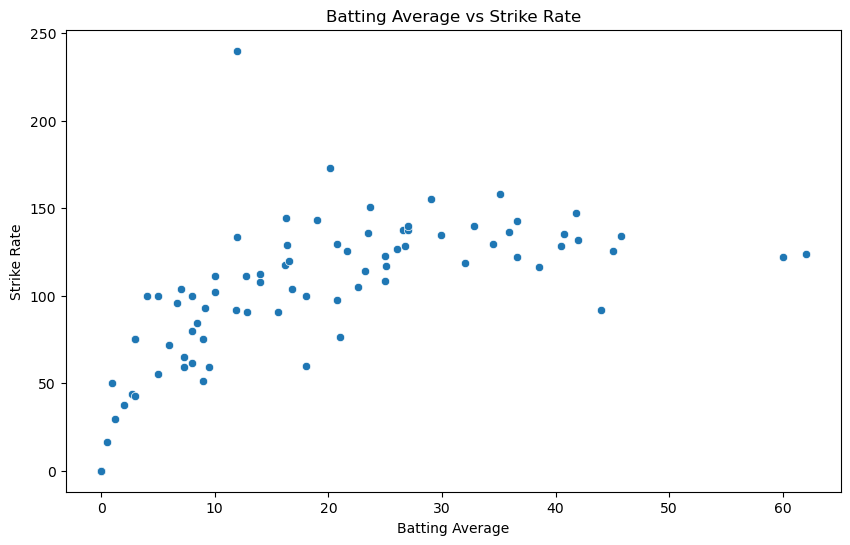

In [87]:
plt.figure(figsize=(10,6))
sns.scatterplot(x='Avg', y='SR', data=batter_analysis)
plt.title('Batting Average vs Strike Rate')
plt.xlabel('Batting Average')
plt.ylabel('Strike Rate')
plt.show()

#### 3 . Boundary Analysis: Analyze the distribution of boundaries (4s and 6s) among batters

In [85]:
top_batters

,striker,played,runs_scored,balls_faced,dots,1's,2's,3's,4's,6's,dismissed,Avg,SR,NotOut
45,MM Lanning,18,676,539,228,180,24,0,97,10,15.0,45.066667,125.417440,3.0
19,EA Perry,17,600,492,187,205,16,1,69,14,10.0,60.000000,121.951220,7.0
80,Shafali Verma,18,561,355,150,99,14,0,59,33,16.0,35.062500,158.028169,2.0
24,H Kaur,16,549,409,150,161,13,0,74,11,12.0,45.750000,134.229829,4.0
48,NR Sciver-Brunt,19,504,383,150,137,15,1,73,7,12.0,42.000000,131.592689,7.0
26,HK Matthews,19,451,386,203,95,12,0,62,14,18.0,25.055556,116.839378,1.0
64,S Mandhana,18,449,366,179,101,11,0,62,13,18.0,24.944444,122.677596,0.0
7,AJ Healy,17,428,334,154,95,9,1,69,6,16.0,26.750000,128.143713,1.0
22,GM Harris,13,418,284,111,96,9,0,52,16,10.0,41.800000,147.183099,3.0
90,YH Bhatia,18,418,366,195,89,7,1,66,8,18.0,23.222222,114.207650,0.0


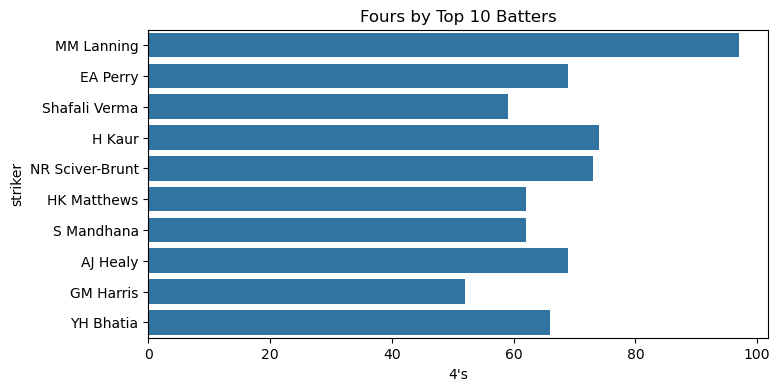

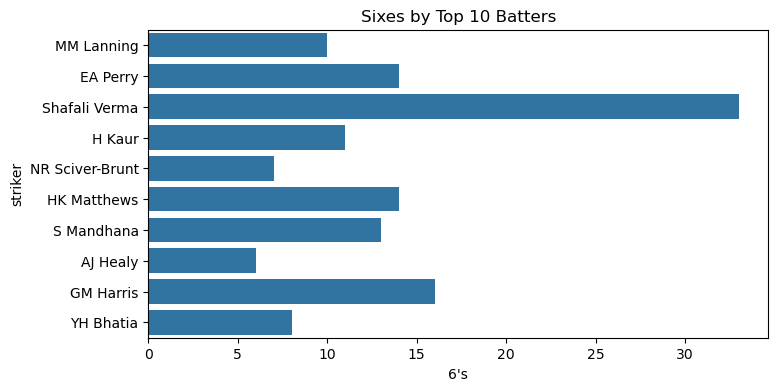

In [81]:
plt.figure(figsize=(8,4))
sns.barplot(x="4's", y='striker', data = top_batters)
plt.title('Fours by Top 10 Batters')
plt.show()

plt.figure(figsize=(8,4))
sns.barplot(x="6's", y='striker', data = top_batters)
plt.title('Sixes by Top 10 Batters')
plt.show()